In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the data
ts = pd.read_csv('https://raw.githubusercontent.com/ml-mipt/ml-mipt-part2/master/2017/seminars/1_ts_esm/data/TimeSeries_Data10.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Dates')
ts.index.names=['Timestamp']
ts = ts.sort_index()

**Statsmodels**

In [3]:
from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

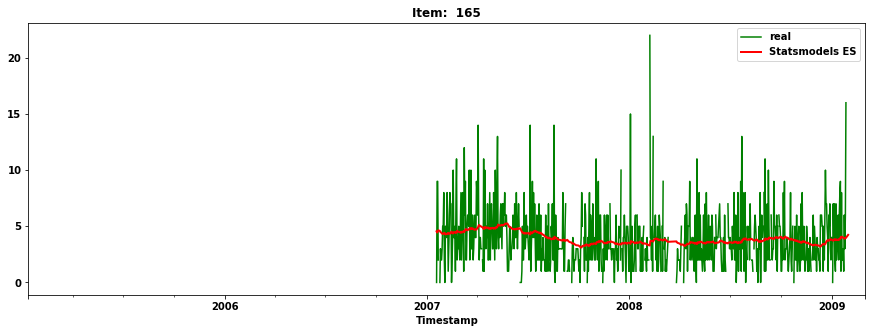

MSE value = 4889.636897090148


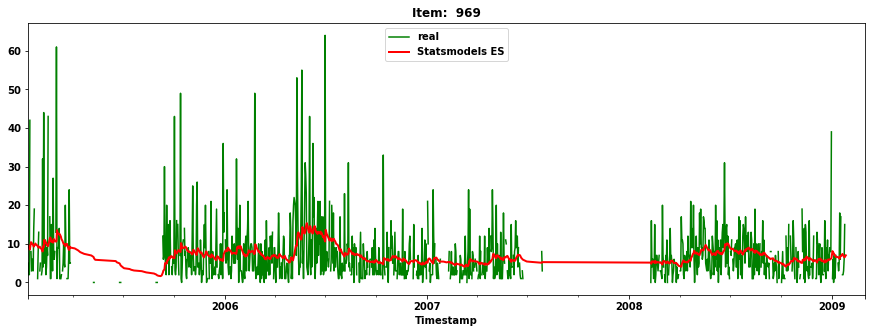

MSE value = 57400.010659366875


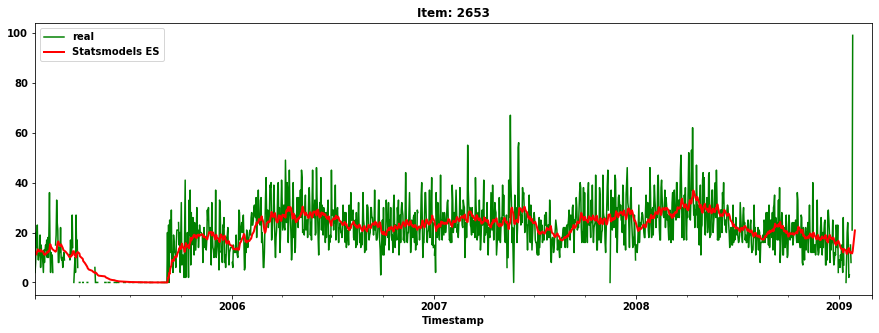

MSE value = 94367.04939719045


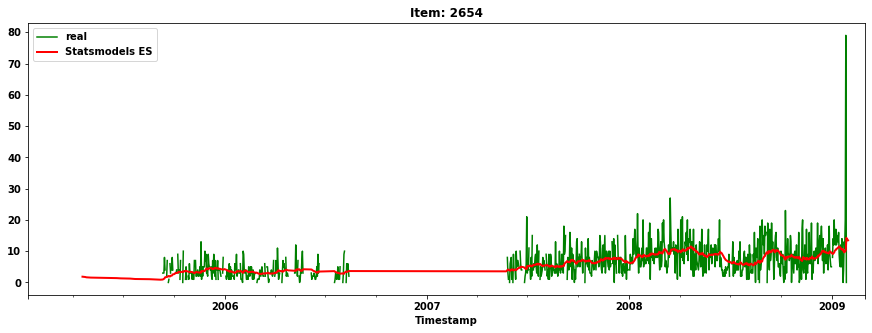

MSE value = 18923.914135839932


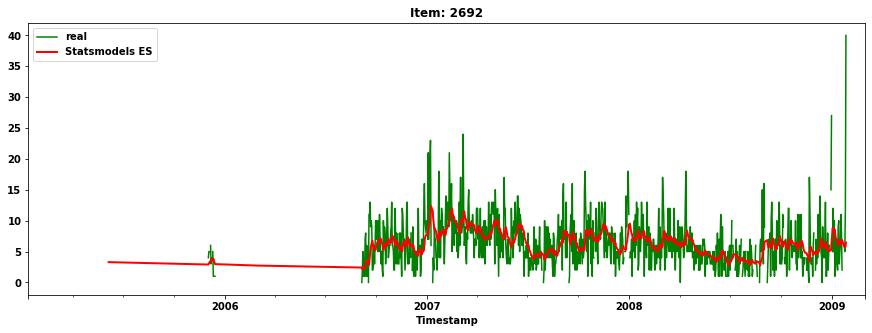

MSE value = 12416.351205320338


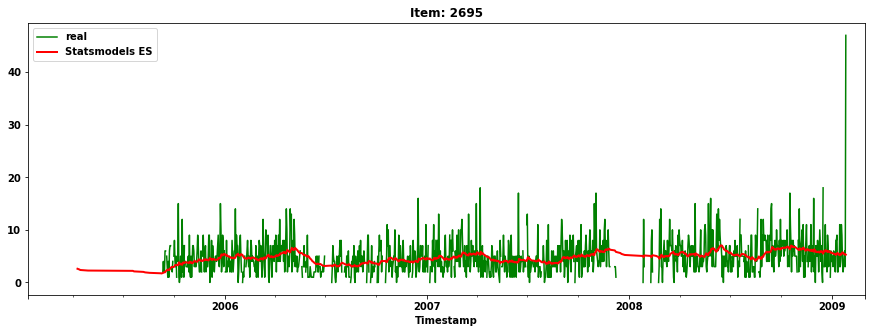

MSE value = 12126.297590260801


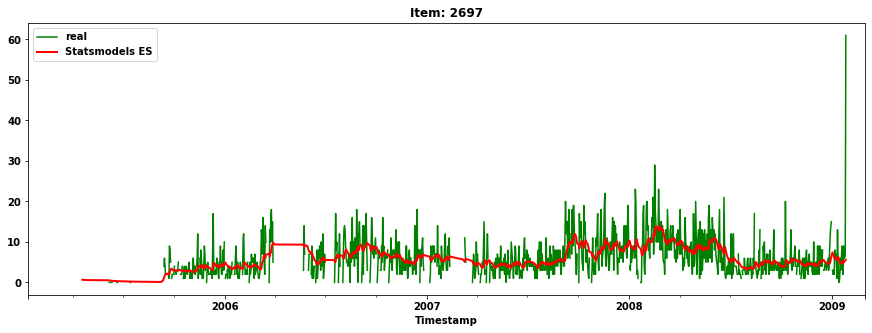

MSE value = 19447.124776796856


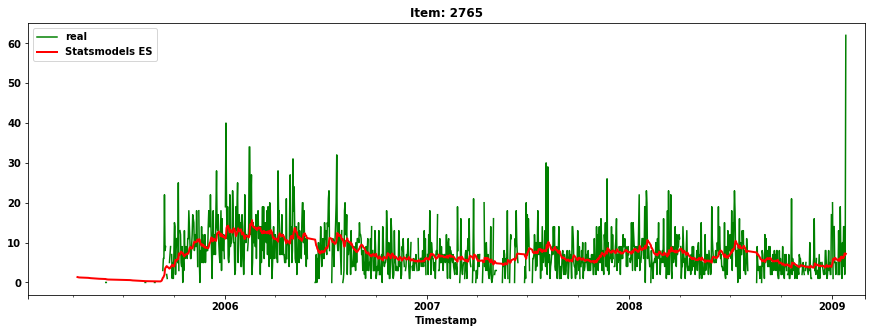

MSE value = 33178.77142484668


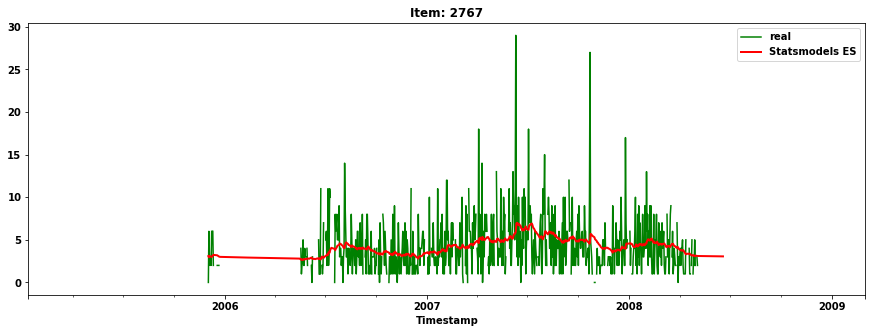

MSE value = 6445.680289460357


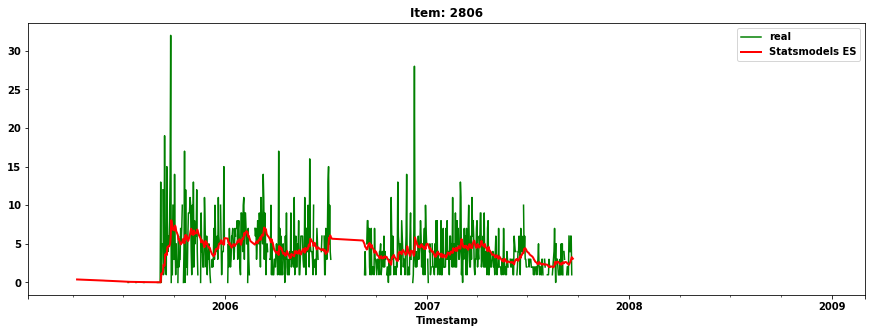

MSE value = 7547.160924107577


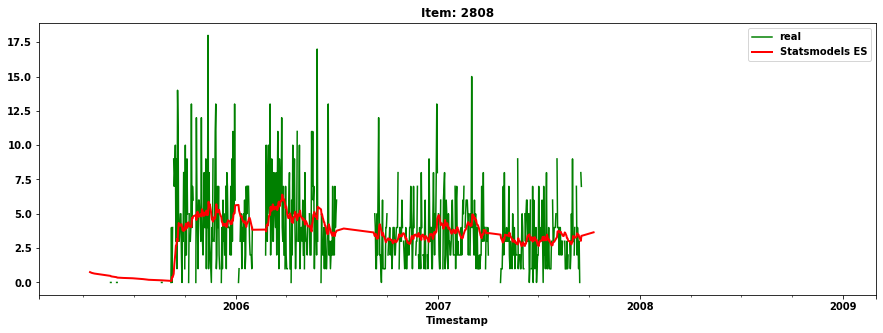

MSE value = 4736.216420834864


In [4]:
ES_statsmodels_loss = []
for col in ts.columns:
    fit = ExponentialSmoothing(ts[col].dropna()).fit()
    ax = ts[col].plot(figsize=(15,5), color='green', label='real')
    fit.fittedvalues.plot(ax=ax, style='-', lw=2, color='red', label='Statsmodels ES');
    plt.title(col)
    plt.legend()
    plt.show()
    
    real = np.array((ts[col]).dropna())
    pred = np.array(fit.fittedvalues)
    ES_statsmodels_loss.append(np.sum(np.square(real-pred)))
    print('MSE value = {}'.format(ES_statsmodels_loss[-1]))

**Pyflux**

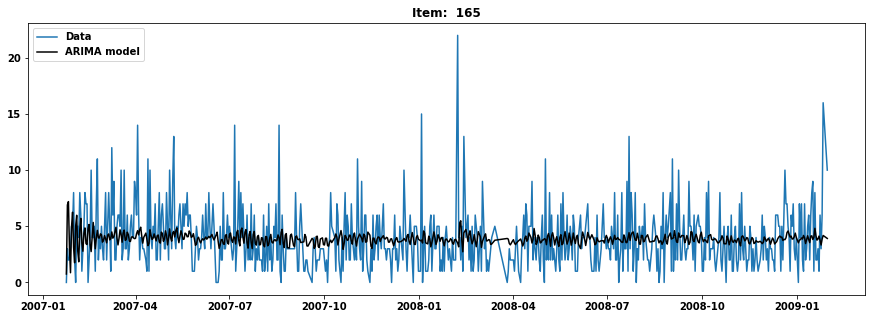

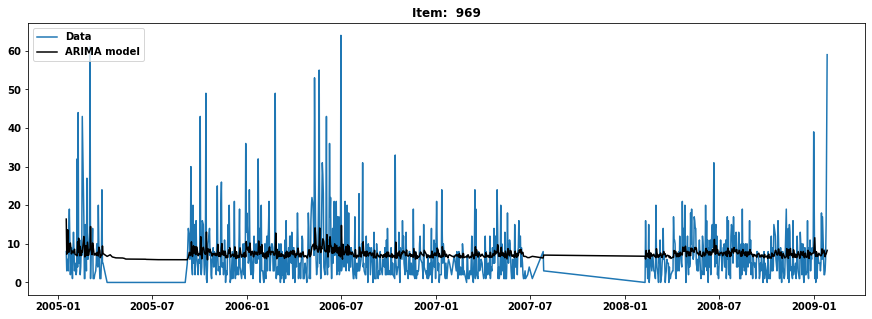

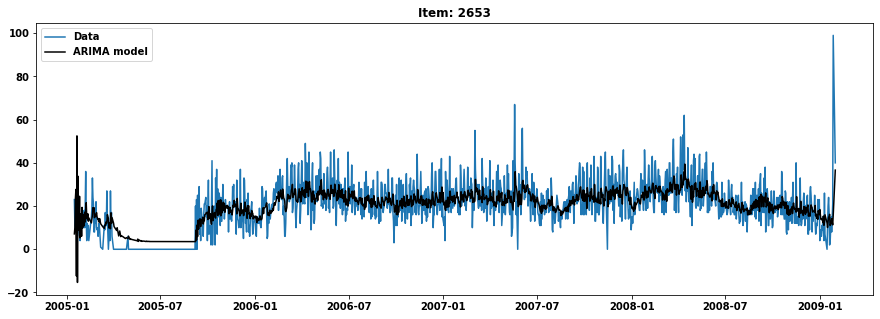

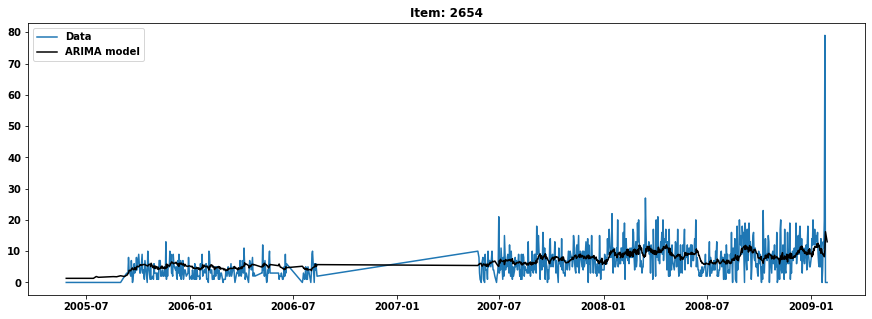

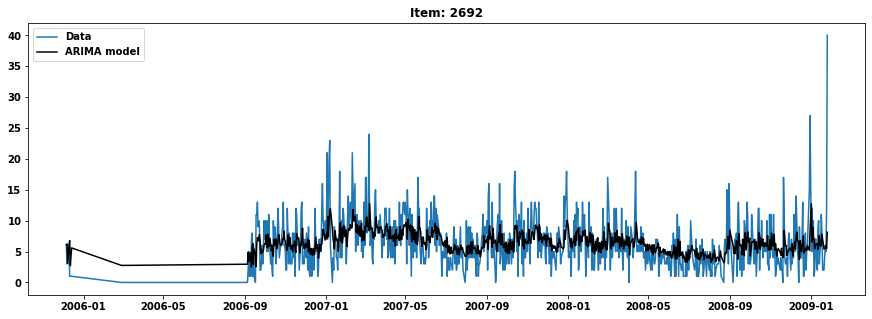

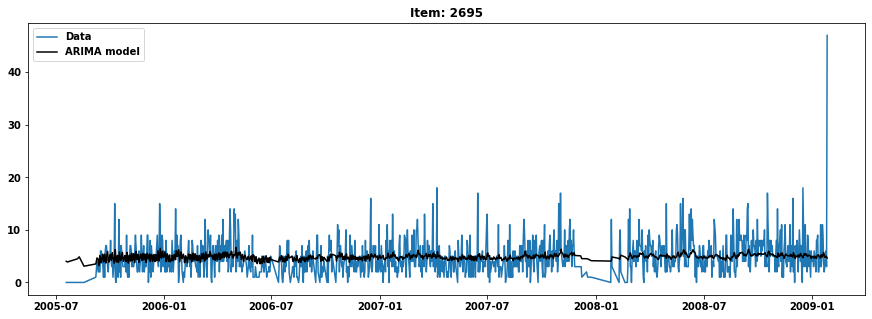

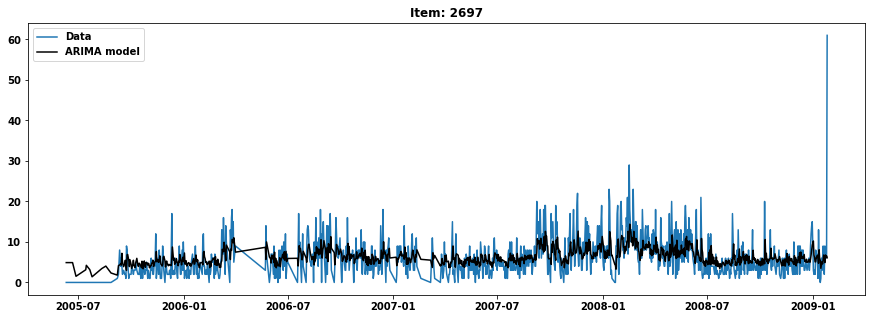

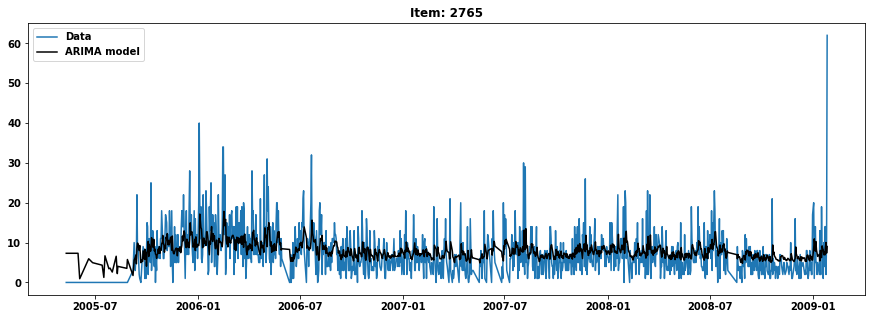

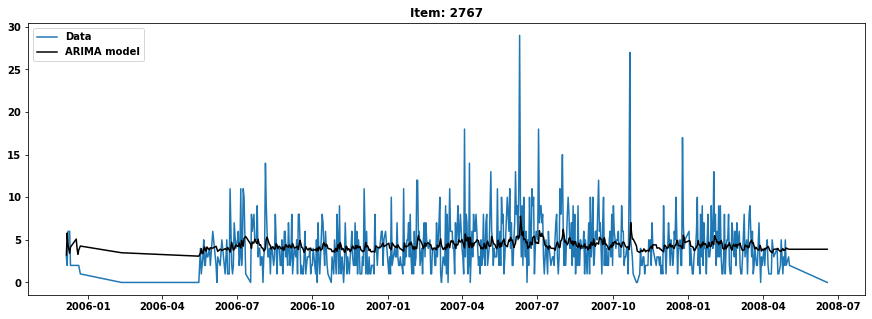

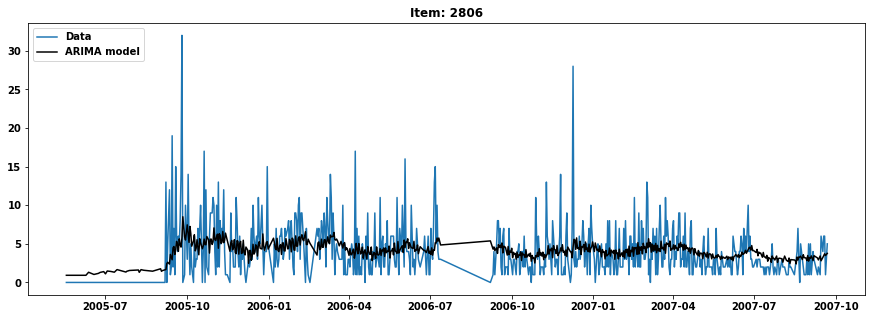

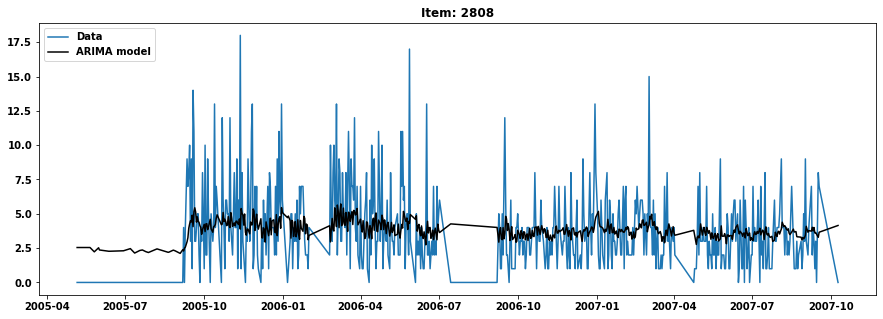

In [5]:
import pyflux as pf
for col in ts.columns:
    model = pf.ARIMA(data=pd.DataFrame(ts[col].dropna()), ar=4, ma=4, family=pf.Normal())
    model.fit(method='MLE')
    model.plot_fit(figsize=(15,5))

**FBprophet**

In [6]:
from fbprophet import Prophet

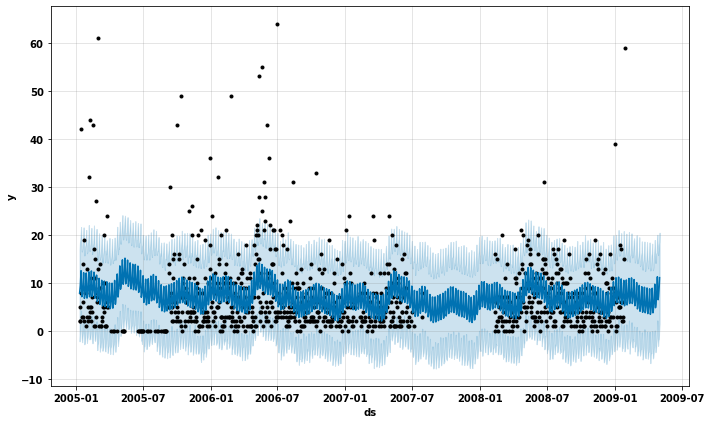

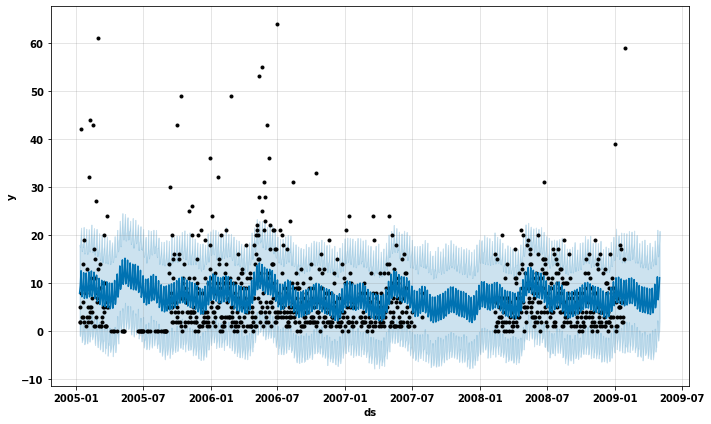

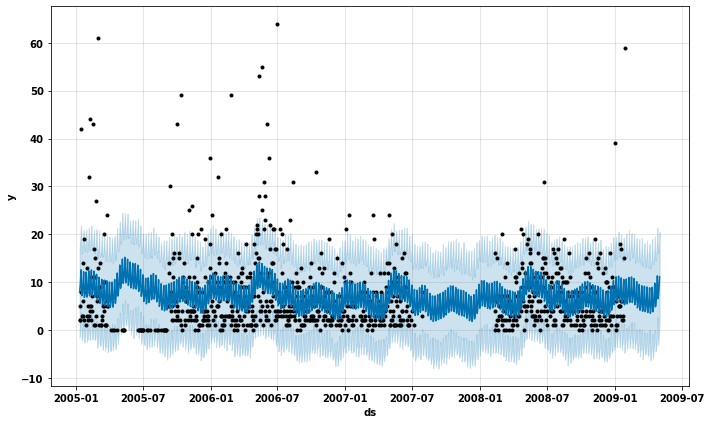

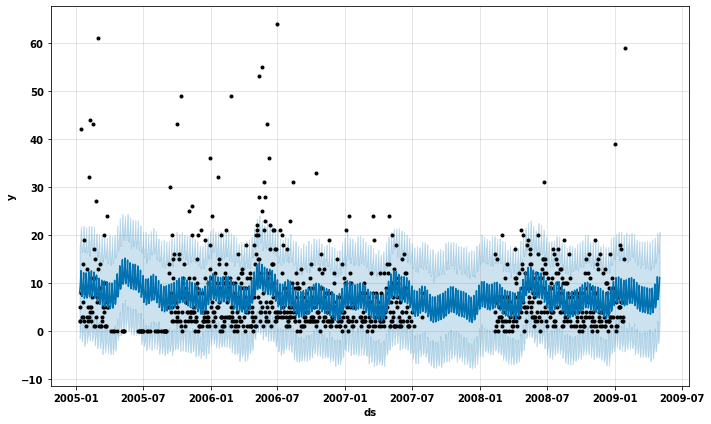

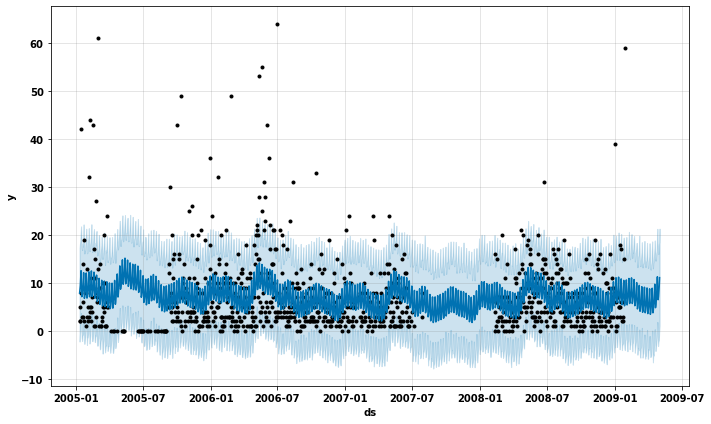

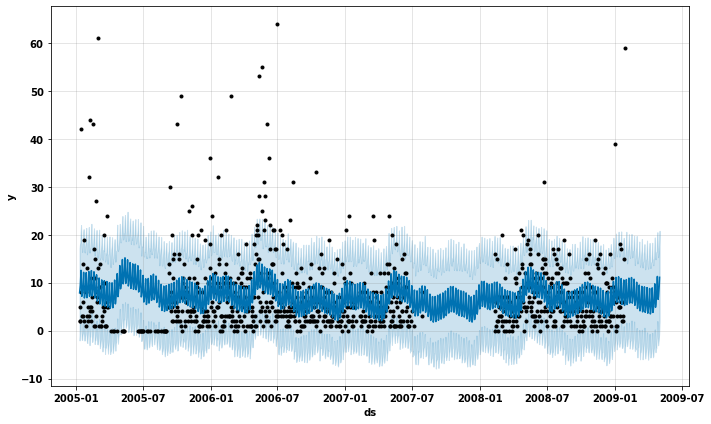

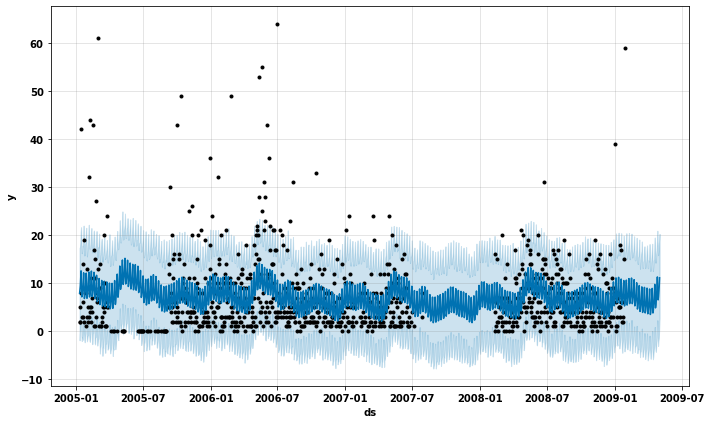

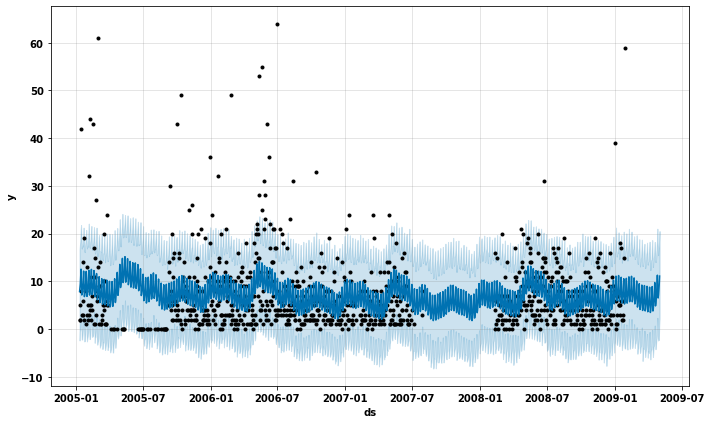

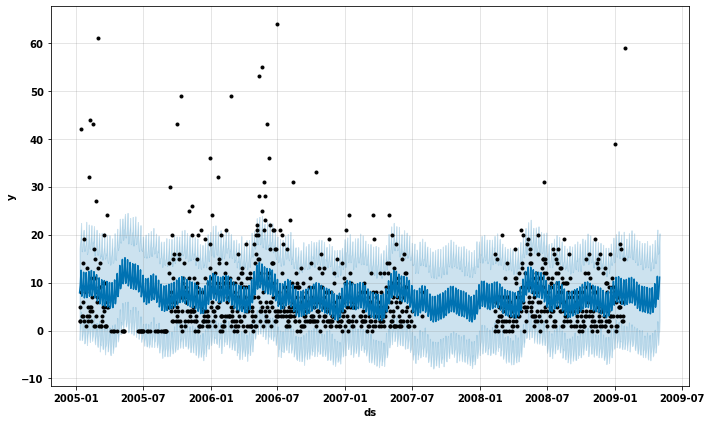

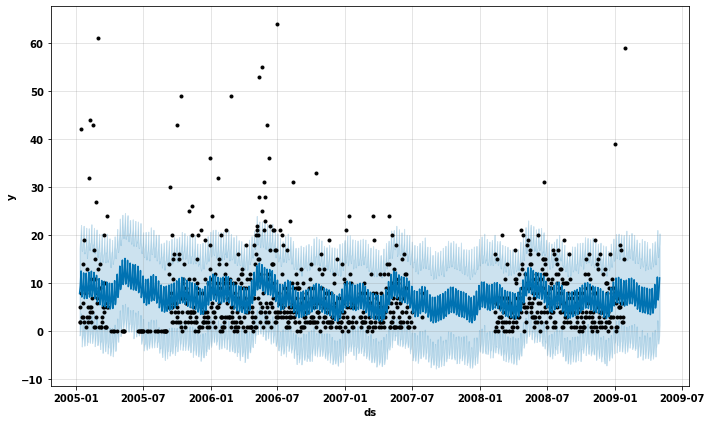

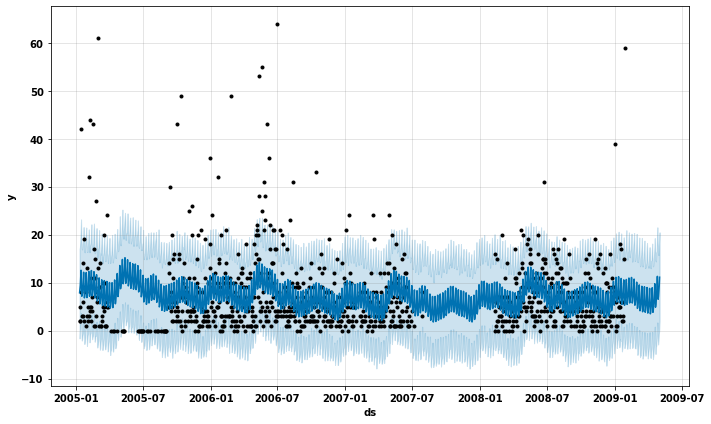

In [7]:
for col in ts.columns:
    df = pd.DataFrame(ts['Item:  969'])
    df['ds'] = df.index
    df['y'] = df['Item:  969']
    df = df.drop(['Item:  969'], axis=1)
    
    m = Prophet(daily_seasonality=True)
    m.fit(df)
    
    future = m.make_future_dataframe(periods=60)
    forecast = m.predict(future)
    
    m.plot(forecast)